## Randomness and Plotting Lecture/Lab 2

-----------

This material is based in part on previous CS108L, see https://cs4all.cs.unm.edu/cs108.html
- Credit to Prof. Melanie Moses, Dr. Irene Lee, Dr. Maureen Psaila-Dombrowski, Prof. Dave Ackley and collaborators (see website)

### Learning Goals

1. Review
    - Pseudo-random numbers
        - Importance of randomness in computing
        - Generate with linear congruential generator
    - Adding elements to a list with append

2. Approximating Pi with random numbers         

### Review: Randomness in computing

    - The use of random numbers in computing plays a key role in many places.
    - Computers are NOT actually random.  They are deterministic machines that only do what their told.
    - Computer output is what you programmed it to do.

### So instead, computers use a determinisitic (predictable) process to produce numbers that look random (but actually aren't truly random).  
    - Gives rise to pseudo-random numbers

### Review: Linear congruential generator for pseudo-random numbers
1. Generate a sequence of pseduo-random numbers with 
    1. $x_0 \leftarrow$ some initial value, say 3, 78, or 8269
    2. $x_1 \leftarrow (a*x_0)\, \% \, m$
    3. $x_2 \leftarrow (a*x_1)\, \% \, m$
    4. ...
2. This generates a sequence of pseudo-random numbers $x_0, x_1, x_2, ...$

Note: 
- The operator $\%$ is the mod (or modulus).  It returns the remainder
- We will use $m = 2^{31} - 1$, a Mersenne prime
- $a$ is some number between 0 and $m$


In [99]:
a = 8269
m = 2**31 - 1

x0 = 3
x1 = a*x0 % m
x2 = a*x1 % m
x3 = a*x2 % m
x4 = a*x3 % m

x0 = x0 / (m-1)
x1 = x1 / (m-1)
x2 = x2 / (m-1)
x3 = x3 / (m-1)
x4 = x4 / (m-1)

print(x0, x1, x2, x3, x4, x5)

1.3969838632242604e-09 1.1551659565001409e-05 0.09552067294299665 0.8604441982325578 0.01307187184046197 0.09130819848860446


### Review: Uses of randomness
1. Random ordering in agent-based modeling
2. Random sampling of data for data analysis
3. Compute useful quantities, like the number Pi
<img src="https://raw.githubusercontent.com/jbschroder/CS108/main/lecture_images/Pi_approx.png" width="350">

### Remember how to append to a list

In [1]:
my_list = []

for i in range(10):
    my_list.append(i)
    
print(my_list)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


### Remember basic plotting

1. Observe how we can start with a list of numbers, and then use `pandas` and `matplotlib` to plot
2. The first two lines do a bit of housecleaning.  Matplotlib is the bottom-level plotting, and we need to tell Matplotlib to inline plots below notebook cells. Pandas is for data manipulation, storage, and general plotting.

        %matplotlib inline
        import pandas as pd

3. We create a list `my_list` of some numbers

        my_list = [5,6,7,8,9,10]

4. Then, we convert `my_list` to a Pandas dataframe with

        df = pd.DataFrame(my_list, columns=['numbers'])
        
5. The data frame stores your list in a column
   - The column has a name `numbers`
   - The column to the very left, just counts off (enumerates) everything, starting at 0

In [4]:
%matplotlib inline
import pandas as pd

In [11]:
my_list = [5,6,7,8,9,10]
df = pd.DataFrame(my_list, columns=['numbers'])
print(df)

   numbers
0        5
1        6
2        7
3        8
4        9
5       10


### To plot the column `numbers` with a point style, do

<AxesSubplot: >

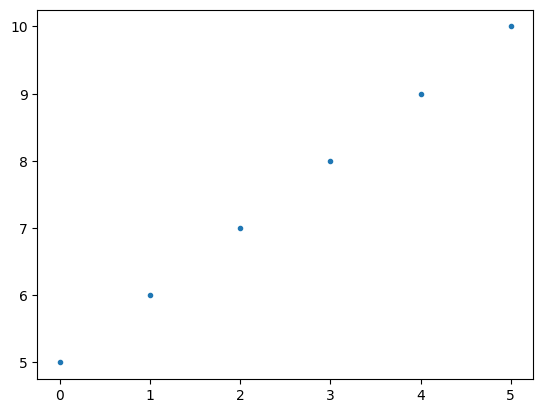

In [6]:
df['numbers'].plot(kind='line', style=['.'])

### We can also plot a continuous line with a different `style`

<AxesSubplot: >

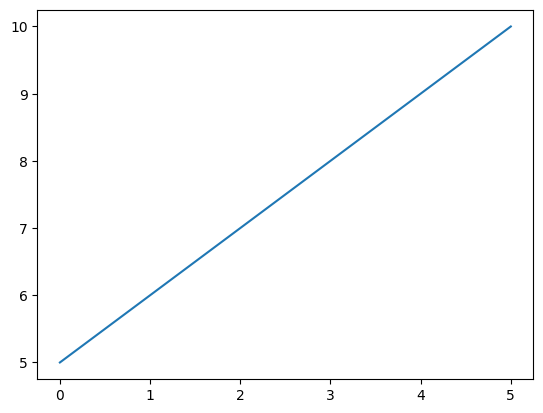

In [7]:
df['numbers'].plot(kind='line', style=['-'])

### Approximating Pi with random data
Consider the unit circle below, and also the square going from -1 to 1

The area of the unit circle with radius 1 is $\pi r^2 = \pi 1^2 = \pi$

The area of the square is $2 \times 2 = 4$ (width times height)


<img src="https://raw.githubusercontent.com/jbschroder/CS108/main/lecture_images/Pi_approx.png" width="350">


### The ratio of these two areas is $$ \frac{\mbox{area of circle}}{\mbox{area of square}} = \frac{\pi}{4}$$
    
### This also tells us what the ratio of random points inside the circle and points inside the square should be, if we take many, many random numbers

 $$ \frac{\mbox{points inside circle}}{\mbox{points inside square}} = \frac{\pi}{4}$$

### This is a limit value, that is, in the limit, as we take more and more random numbers, this ratio approaches $\pi/4$

### This gives us an algorithm, or procedure for approximating Pi
        N = something large
        num_inside = 0
        
        for loop with N iterations
            generate rand_point inside the square 
            
            if rand_point is less than distance 1 from origin:
                increase num_inside by 1               
        
        pi/4 = num_inside / N
        
### Or, we can use $$ \pi = 4 \left(\frac{\mbox{num_inside}}{\mbox{N}}\right) $$

### Remember, that $N$ is the total number of points inside the square (see picture)

### We make two simplifications: 
1. Our `rand_point` equals (x,y) for some random point in the square. So, the distance of that point from the origin is less than 1, if $$x^2 + y^2 < 1$$

2. Directly compute pi by multiplying by 4

        N = something large
        num_inside = 0
        
        for loop with N iterations
        
            generate rand_point inside the square 
            
            get x and y from the rand_point

            if x**2 + y**2 is less than 1:
                increase num_inside by 1
                                  
        pi = 4*( num_inside / N)
        print(pi, ":  approximation to pi")

### Lab Tasks

### We first have to do a little housecleaning, and import our packages for plotting and data manipulation
1. Matplotlib is the bottom-level plotting, and we need to tell Matplotlib to inline plots below notebook cells
2. Pandas is for data manipulation, storage, and plotting

In [1]:
%matplotlib inline
import pandas as pd

### Tasks: Create code cells below to accomplish the following tasks

1. Implement the above algorithm, with the two simplifications.
    - You will need a way to generate a random point (`rand_point`) inside the square.
    - It is recommended to use your `pseudorand` function from the last lab.  
    - Consider a procedure like this    

            rand_number1 = pseudorand(old_rand)
            rand_number2 = pseudorand(rand_number1)
            
            old_rand = rand_number2
            
            x = rand_number1 divided, muliplied, and subtracted 
                to be within the range of [-1, 1]
                
            Do the same for y, so that y is based on rand_number2
                and is within the range [-1, 1]
    
            
    
- This should give you an `x` and `y` that are pseudo-random, and between -1 and 1

2. Update your loop to store all of your pseudo-random (x,y) points.  
    - Create two empty lists before the loop, call them `rand_x` and `rand_y`
    - Each loop iteration, append to these lists with
    
            rand_x.append(x)
            rand_y.append(y)
           

3. How large must N be in order to get close to pi (even 3 or 4 digits)? 
   - For reference, pi = 3.141592653...

4. Plot a point cloud in 2D using pandas for N=25
   - This is a scatter plot
   - Here's a simple scatter plot that you can adapt
           
           datax = [-0.54, 0.32, -0.05, -0.92, 0.62]
           datay = [0.12,  0.82, -0.35, -0.32, -0.12]
           
           df = pd.DataFrame({'rand x': datax, 'rand y': datay})
           ax = df.plot.scatter(x='rand x', y='rand y')
           ax.axis('equal')
   
   - Note that you create a data frame with two datasets, `datax` and `datay`
   - When you create the scatter plot, you must specify the `x` and `y` coordinates


Fri: Lecture and Code Examples

Review some of the stuff from Monday
 - List append
 - Linear congruential

discuss monte carlo approach to computing pi (see website)
 https://www.geeksforgeeks.org/estimating-value-pi-using-monte-carlo/

show how to plot (scatter) point clouds
datax, datay = ...
df = pd.DataFrame({'rand x': datax, 'rand y': datay})
ax = df.plot.scatter(x='rand x', y='rand y')
ax.axis('equal')

Then circle...?

Fri: Exercises
- Take loop from wed that gets rand (x,y) 
- Plot point clouds for n = 10, n=50, n= 200
    - need three plots for grading
    - draw unit circle (need example code for this probably...) and square
    
- Compute pi for each n
    - and compute pi - reference value above, does your approximation get better?
    

Compute median and mean of your random numbers as n gets larger.  Plot n on th x-axis and the mean and median on the y-axis.  What do you expect as n gets large?

df['numbers'].mean()  

Say collect evidence, evaluate the evidence, and draw a conclusion

Instructions to hand in IPYNB

----

update below to use LCG, check it works OK

In [9]:
import numpy as np
import pandas as pd

K = 1000000
datax = np.random.randint(0,2**31-1,size=K)
datax = (2/(2**31-1))*datax - 1
datay = np.random.randint(0,2**31-1,size=K)
datay = (2/(2**31-1))*datay - 1

df = pd.DataFrame({'rand x': datax, 'rand y': datay})

distance = (df['rand x']**2 + df['rand y']**2)**(0.5) 
print(datax.min())
print(datax.max())
print(datay.min())
print(datay.max())

print(distance.max())
print(distance.min())

num_inside = distance < 1.0
num_inside = num_inside.sum()
num_outside = K
print(num_outside, "num outside")
print(num_inside, "num inside")
print(num_inside/num_outside, "ratio")

pi = 4*(num_inside/num_outside)
print(pi, "approx to pi")

-0.9999999981373549
0.9999997969716787
-0.9999988004565233
0.9999984437599772
1.4125920169674524
0.0005961565294441817
1000000 num outside
785849 num inside
0.785849 ratio
3.143396 approx to pi


(-1.1, 1.1, -1.1, 1.1)

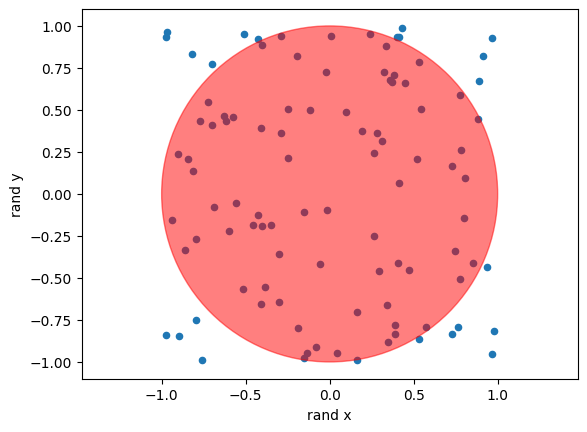

In [62]:
from matplotlib import pyplot as plt
circle = plt.Circle((0,0), 1.0, alpha=0.5, color='r')

ax = df.plot.scatter(x='rand x', y='rand y')
ax.add_patch(circle)
ax.axis('equal')